In [75]:
%matplotlib notebook

In [76]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


In [77]:
tripdata_file = "RideShare_Data_201812.csv"

src_df = pd.read_csv(tripdata_file)
#loc_df =src_df.dropna()
src_df

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-12-01 20:36:42,2018-12-01 21:20:11,13.0,255.0,1.0,"Battery Park City, Manhattan","Williamsburg (North Side), Brooklyn",10024,11211,43.0,44,55,2,803,Clouds,broken clouds
1,2018-12-01 19:22:04,2018-12-01 19:30:08,230.0,142.0,0.0,"Times Sq/Theatre District, Manhattan","Lincoln Square East, Manhattan",10024,10024,8.0,44,55,2,803,Clouds,broken clouds
2,2018-12-01 10:05:13,2018-12-01 10:15:59,127.0,152.0,0.0,"Inwood, Manhattan","Manhattanville, Manhattan",10024,10027,11.0,34,79,2,701,Mist,mist
3,2018-12-01 16:37:09,2018-12-01 16:53:38,138.0,157.0,0.0,"LaGuardia Airport, Queens","Maspeth, Queens",11371,11366,16.0,43,59,1,800,Clear,sky is clear
4,2018-12-01 12:08:27,2018-12-01 12:21:40,168.0,41.0,1.0,"Mott Haven/Port Morris, Bronx","Central Harlem, Manhattan",10462,10024,13.0,33,78,1,741,Fog,fog
5,2018-12-01 09:18:25,2018-12-01 09:30:01,129.0,82.0,0.0,"Jackson Heights, Queens","Elmhurst, Queens",11366,11366,12.0,35,76,3,701,Mist,mist
6,2018-12-01 18:23:11,2018-12-01 18:35:26,78.0,248.0,0.0,"East Tremont, Bronx","West Farms/Bronx River, Bronx",10457,10462,12.0,44,59,2,500,Rain,light rain
7,2018-12-01 23:18:39,2018-12-01 23:24:20,164.0,68.0,0.0,"Midtown South, Manhattan","East Chelsea, Manhattan",10017,10024,6.0,42,62,4,500,Rain,light rain
8,2018-12-01 20:12:21,2018-12-01 20:40:07,108.0,132.0,1.0,"Gravesend, Brooklyn","JFK Airport, Queens",11216,11366,28.0,44,51,2,803,Clouds,broken clouds
9,2018-12-01 02:59:53,2018-12-01 03:13:46,130.0,139.0,0.0,"Jamaica, Queens","Laurelton, Queens",11366,11366,14.0,39,75,1,804,Clouds,overcast clouds


In [78]:
sorted_data = src_df.sort_values(["Pickup_DateTime"],ascending =True)
sorted_data

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
236,2018-12-01 00:00:00,2018-12-01 00:31:33,53.0,219.0,1.0,"College Point, Queens","Springfield Gardens South, Queens",11366,11366,32.0,39,79,3,500,Rain,light rain
3743,2018-12-01 00:00:09,2018-12-01 00:23:57,42.0,208.0,1.0,"Central Harlem North, Manhattan","Schuylerville/Edgewater Park, Bronx",10024,10462,24.0,39,79,3,500,Rain,light rain
1679,2018-12-01 00:00:10,2018-12-01 00:14:50,249.0,148.0,0.0,"West Village, Manhattan","Lower East Side, Manhattan",10024,10024,15.0,39,79,3,500,Rain,light rain
456,2018-12-01 00:00:16,2018-12-01 00:28:07,48.0,146.0,0.0,"Clinton East, Manhattan","Long Island City/Queens Plaza, Queens",10024,11101,28.0,39,79,3,500,Rain,light rain
8625,2018-12-01 00:00:22,2018-12-01 00:06:25,143.0,239.0,0.0,"Lincoln Square West, Manhattan","Upper West Side South, Manhattan",10024,10024,6.0,39,79,3,500,Rain,light rain
2833,2018-12-01 00:00:28,2018-12-01 00:08:11,159.0,69.0,1.0,"Melrose South, Bronx","East Concourse/Concourse Village, Bronx",10451,10451,8.0,39,79,3,500,Rain,light rain
6639,2018-12-01 00:00:31,2018-12-01 00:36:45,236.0,40.0,0.0,"Upper East Side North, Manhattan","Carroll Gardens, Brooklyn",10024,11216,36.0,39,79,3,500,Rain,light rain
8591,2018-12-01 00:00:39,2018-12-01 00:07:52,214.0,214.0,0.0,"South Beach/Dongan Hills, Staten Island","South Beach/Dongan Hills, Staten Island",10306,10306,7.0,39,79,3,500,Rain,light rain
1254,2018-12-01 00:00:40,2018-12-01 00:14:00,36.0,198.0,1.0,"Bushwick North, Brooklyn","Ridgewood, Queens",11216,11366,13.0,39,79,3,500,Rain,light rain
5954,2018-12-01 00:00:40,2018-12-01 00:17:28,254.0,126.0,1.0,"Williamsbridge/Olinville, Bronx","Hunts Point, Bronx",10467,10462,17.0,39,79,3,500,Rain,light rain


In [79]:
src_df['weather_main'] = src_df['weather_main'].astype(str)
weather_grp_df = src_df.groupby(src_df['weather_main'])
weather_grp_df.head()


,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-12-01 20:36:42,2018-12-01 21:20:11,13.0,255.0,1.0,"Battery Park City, Manhattan","Williamsburg (North Side), Brooklyn",10024,11211,43.0,44,55,2,803,Clouds,broken clouds
1,2018-12-01 19:22:04,2018-12-01 19:30:08,230.0,142.0,0.0,"Times Sq/Theatre District, Manhattan","Lincoln Square East, Manhattan",10024,10024,8.0,44,55,2,803,Clouds,broken clouds
2,2018-12-01 10:05:13,2018-12-01 10:15:59,127.0,152.0,0.0,"Inwood, Manhattan","Manhattanville, Manhattan",10024,10027,11.0,34,79,2,701,Mist,mist
3,2018-12-01 16:37:09,2018-12-01 16:53:38,138.0,157.0,0.0,"LaGuardia Airport, Queens","Maspeth, Queens",11371,11366,16.0,43,59,1,800,Clear,sky is clear
4,2018-12-01 12:08:27,2018-12-01 12:21:40,168.0,41.0,1.0,"Mott Haven/Port Morris, Bronx","Central Harlem, Manhattan",10462,10024,13.0,33,78,1,741,Fog,fog
5,2018-12-01 09:18:25,2018-12-01 09:30:01,129.0,82.0,0.0,"Jackson Heights, Queens","Elmhurst, Queens",11366,11366,12.0,35,76,3,701,Mist,mist
6,2018-12-01 18:23:11,2018-12-01 18:35:26,78.0,248.0,0.0,"East Tremont, Bronx","West Farms/Bronx River, Bronx",10457,10462,12.0,44,59,2,500,Rain,light rain
7,2018-12-01 23:18:39,2018-12-01 23:24:20,164.0,68.0,0.0,"Midtown South, Manhattan","East Chelsea, Manhattan",10017,10024,6.0,42,62,4,500,Rain,light rain
8,2018-12-01 20:12:21,2018-12-01 20:40:07,108.0,132.0,1.0,"Gravesend, Brooklyn","JFK Airport, Queens",11216,11366,28.0,44,51,2,803,Clouds,broken clouds
9,2018-12-01 02:59:53,2018-12-01 03:13:46,130.0,139.0,0.0,"Jamaica, Queens","Laurelton, Queens",11366,11366,14.0,39,75,1,804,Clouds,overcast clouds


In [80]:
time_duration_df = weather_grp_df["Trip_Duration"]

timeduration_avg = (time_duration_df.mean()).tolist()
timeduration_avg
timeduration_cnt = (time_duration_df.count()).tolist()
timeduration_cnt

#(time_duration_df.count())

[44801, 126961, 260, 1460, 15196, 68493, 4222, 161]

In [81]:

weather_main = (weather_grp_df["weather_main"].unique()).index.tolist()

weather_main


['Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain', 'Snow', 'Thunderstorm']

In [82]:
x_axis = np.arange(len(timeduration_avg))
x_axis
x_axix_cnt = np.arange(len(timeduration_cnt))
x_axix_cnt

array([0, 1, 2, 3, 4, 5, 6, 7])

<IPython.core.display.Javascript object>


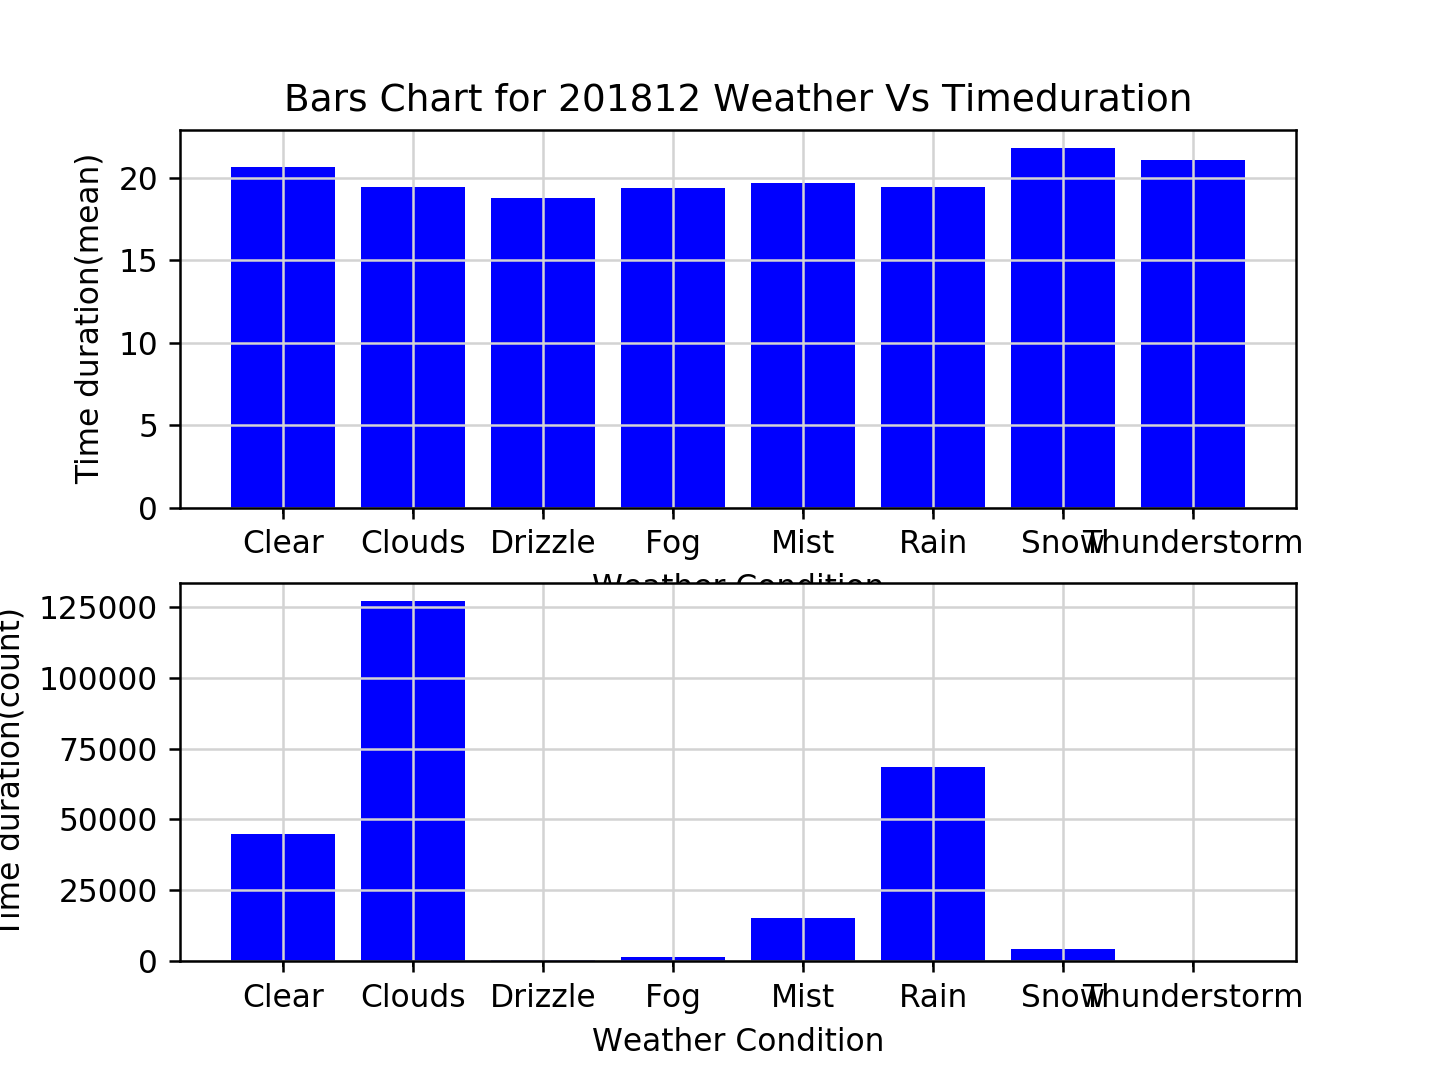

In [83]:
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.bar(weather_main, timeduration_avg, color="b", align="center")
ax1.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
ax2.bar(weather_main, timeduration_cnt, color="b", align="center")
ax2.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


In [84]:
tick_locations = [value for value in x_axis]
ax1.set_xticks(tick_locations, weather_main)
# Give the chart a title, x label, and y label
ax1.set_title("Bars Chart for 201812 Weather Vs Timeduration")
ax1.set_xlabel("Weather Condition")
ax1.set_ylabel("Time duration(mean)")

Text(105.875, 0.5, 'Time duration(mean)')

In [85]:
tick_locations = [value for value in x_axis]
ax2.set_xticks(tick_locations, weather_main)
# Give the chart a title, x label, and y label

ax2.set_xlabel("Weather Condition")
ax2.set_ylabel("Time duration(count)")


Text(26.375, 0.5, 'Time duration(count)')

In [86]:
# Save an image of the chart and print it to the screen
plt.savefig("Bar_201812_weather_timeduration.png")
plt.show()